In [1]:
import numpy as np
import math

In [23]:
cost_to_move = -2
reward_value = +10
lambda_request_loc_a = 3
lambda_return_loc_a = 3
lambda_request_loc_b = 4
lambda_return_loc_b = 2
total_cars = 10
GRID_DIM = (total_cars+1)
max_allowed_to_move = 5
gamma = 0.9
ACTIONS = np.array(list(range(-max_allowed_to_move,max_allowed_to_move+1)))
print(ACTIONS)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]


In [3]:
def factorial(n):
    value = 1
    for i in range(1, n+1):
        value *= i
    return value
factorial(5)

120

In [4]:
def get_poisson_value(mean, num):
#     print(num)
    return ((mean**num)*math.exp(-mean))/factorial(num) 


In [5]:
get_poisson_value(1., 2)

0.18393972058572117

In [9]:
def get_state_value(V_s, cur_state, action):
#     if action >=1:
#         cost = (action -1) * cost_to_move
#     else:    
#         cost = cost_to_move * np.abs(action) #$2
    cost = cost_to_move * np.abs(action)
    next_state_i = cur_state[0] - action
    next_state_j = cur_state[1] + action
    reward = 0.0
    if next_state_i > total_cars:
        next_state_i = total_cars
    if next_state_j > total_cars:
        next_state_j = total_cars
    reward  += cost
    for reqa in range(max_allowed_to_move): # location a request
        for reqb in range(max_allowed_to_move): # location b request 
            # calculate prob 
            prob_request_loc_a = get_poisson_value(lambda_request_loc_a, reqa)
            prob_request_loc_b = get_poisson_value(lambda_request_loc_b, reqb)
            prob_request = prob_request_loc_a * prob_request_loc_b
            
            loca_cars = next_state_i
            locb_cars = next_state_j
            
            req_A = next_state_i
            req_B = next_state_j
            
            if reqa < next_state_i:
                req_A = reqa
            if reqb < next_state_j:
                req_B = reqb
            
            loca_cars = loca_cars - req_A
            locb_cars = locb_cars - req_B
            
            

            reward_req = (req_A + req_B) * reward_value # $10
            for k in range(max_allowed_to_move): # location a return 
                for l in range(max_allowed_to_move): # location b return 
                    # calculate reward 
                    prob_return_loc_a = get_poisson_value(lambda_return_loc_a, k)
                    prob_return_loc_b = get_poisson_value(lambda_return_loc_b, l)
                    prob_return = prob_return_loc_a * prob_return_loc_b
                    total_prob = prob_return * prob_request
                    tot_cars_a = loca_cars + k
                    tot_cars_b = locb_cars + l
                    if tot_cars_a > total_cars:
                        tot_cars_a = total_cars
                    if tot_cars_b > total_cars:
                        tot_cars_b = total_cars
#                     if tot_cars_a > 10 and tot_cars_b > 10 :
#                         reward_req -= 4.
                    reward += total_prob * (reward_req + gamma*V_s[tot_cars_a, tot_cars_b])
                    
    
    return reward
#     return  [next_state_i,next_state_j], reward + cost 
    
    # return  reward ,  prob  
    
    
    

In [10]:
V_s = np.zeros((GRID_DIM, GRID_DIM))
print(V_s.shape)
pi_ = np.zeros_like(V_s).astype(int)

policy_stable = False
count = 0
while not policy_stable:
    print('Iteration', count, policy_stable)
    policy_stable = True
    while True:
        delta = 0
        for i in range(GRID_DIM):
            for j in range(GRID_DIM):
                v = V_s[i,j]
                cur_loc = np.array([i, j])
                action = ACTIONS[pi_[i, j]]

                value = get_state_value(V_s, cur_loc, action ) # calculate value to update
                V_s[i,j] = value 
#                 print('Reward', value, 'Delta', delta)
                delta = max(delta, abs(v - V_s[i,j]))
#                 print(delta)
        if delta < 1e-1:
            break

    for i in range(GRID_DIM):
        for j in range(GRID_DIM):
            old_action = pi_[i, j]
            values = []
            cur_loc = np.array([i,j])
            for action in ACTIONS:
                value = get_state_value(V_s, cur_loc, action)
                values.append(value) # recalculate value 
            pi_[i,j] = ACTIONS[np.argmax(values)] # pick greedy action 
#             print(values)
            if old_action != pi_[i, j]:
                policy_stable = False
    
    count += 1
    
# print(V_s)
# print(pi_)

(11, 11)
Iteration 0 False
Iteration 1 False
Iteration 2 False
Iteration 3 False


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
print(pi_)

[[ 0  0  0  0  0 -1 -1 -1 -2 -2 -2]
 [ 0  0  0  0  0  0  0 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0]
 [ 2  1  1  0  0  0  0  0  0  0  0]
 [ 2  2  1  0  0  0  0  0  0  0  0]
 [ 3  2  1  0  0  0  0  0  0  0  0]
 [ 3  2  1  0  0  0  0  0  0  0  0]
 [ 3  2  1  0  0  0  0  0  0  0  0]
 [ 3  2  1  0  0  0  0  0  0  0  0]]


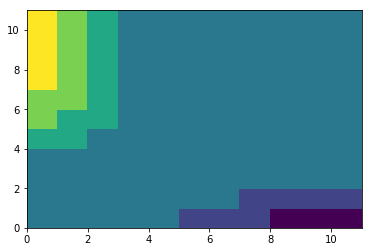

In [13]:
plt.pcolor(pi_)
plt.show()



### With book changes

In [33]:
def get_state_value(V_s, cur_state, action):
    if action >=1:
        cost = np.abs(action - 1) * cost_to_move
    else:    
        cost = cost_to_move * np.abs(action) #$2
#     cost = cost_to_move * np.abs(action)
    next_state_i = cur_state[0] - action
    next_state_j = cur_state[1] + action
    reward = 0.0
    if next_state_i > total_cars:
        next_state_i = total_cars
    if next_state_j > total_cars:
        next_state_j = total_cars
    reward  += cost
    for reqa in range(max_allowed_to_move): # location a request
        for reqb in range(max_allowed_to_move): # location b request 
            # calculate prob 
            prob_request_loc_a = get_poisson_value(lambda_request_loc_a, reqa)
            prob_request_loc_b = get_poisson_value(lambda_request_loc_b, reqb)
            prob_request = prob_request_loc_a * prob_request_loc_b
            
            loca_cars = next_state_i
            locb_cars = next_state_j
            
            req_A = next_state_i
            req_B = next_state_j
            
            if reqa < next_state_i:
                req_A = reqa
            if reqb < next_state_j:
                req_B = reqb
            
            loca_cars = loca_cars - req_A
            locb_cars = locb_cars - req_B
            
            

            reward_req = (req_A + req_B) * reward_value # $10
            for k in range(max_allowed_to_move): # location a return 
                for l in range(max_allowed_to_move): # location b return 
                    # calculate reward 
                    prob_return_loc_a = get_poisson_value(lambda_return_loc_a, k)
                    prob_return_loc_b = get_poisson_value(lambda_return_loc_b, l)
                    prob_return = prob_return_loc_a * prob_return_loc_b
                    total_prob = prob_return * prob_request
                    tot_cars_a = loca_cars + k
                    tot_cars_b = locb_cars + l
                    if tot_cars_a > total_cars:
                        tot_cars_a = total_cars
                    if tot_cars_b > total_cars:
                        tot_cars_b = total_cars
                    if tot_cars_a > 10 and tot_cars_b > 10 :
                        reward_req -= 4.
                    reward += total_prob * (reward_req + gamma*V_s[tot_cars_a, tot_cars_b])
                    
    
    return reward
#     return  [next_state_i,next_state_j], reward + cost 
    
    # return  reward ,  prob  
    
    
    

In [34]:
V_s = np.zeros((GRID_DIM, GRID_DIM))
print(V_s.shape)
pi_ = np.zeros_like(V_s).astype(int)

policy_stable = False
count = 0
while not policy_stable:
    print('Iteration', count, policy_stable)
    policy_stable = True
    while True:
        delta = 0
        for i in range(GRID_DIM):
            for j in range(GRID_DIM):
                v = V_s[i,j]
                cur_loc = np.array([i, j])
                action = ACTIONS[pi_[i, j]]

                value = get_state_value(V_s, cur_loc, action ) # calculate value to update
                V_s[i,j] = value 
#                 print('Reward', value, 'Delta', delta)
                delta = max(delta, abs(v - V_s[i,j]))
#                 print(delta)
        if delta < 1e-1:
            break

    for i in range(GRID_DIM):
        for j in range(GRID_DIM):
            old_action = pi_[i, j]
            values = []
            cur_loc = np.array([i,j])
            for action in ACTIONS:
                value = get_state_value(V_s, cur_loc, action)
                values.append(value) # recalculate value 
            pi_[i,j] = ACTIONS[np.argmax(values)] # pick greedy action 
#             print(values)
            if old_action != pi_[i, j]:
                policy_stable = False
    
    count += 1

(11, 11)
Iteration 0 False
Iteration 1 False
Iteration 2 False
Iteration 3 False


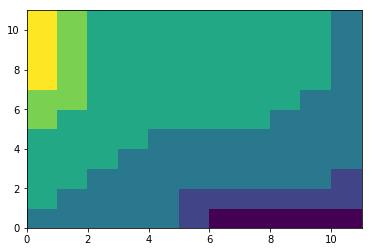

In [35]:
plt.pcolor(pi_)
plt.show()


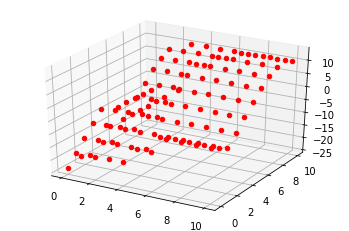

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca( projection='3d')
for i in range(total_cars+1):
    for j in range(total_cars+1):
        ax.scatter(i, j , V_s[i, j], color='r')

plt.show()